# SEL0611 - Fundamentos de Controle

Prof. Valdir Grassi Jr

Este é um exemplo do uso da biblioteca [Python Control System](https://github.com/python-control/python-control) para representar o modelo dinâmico de sistemas de primeira e segunda ordem, e obter a resposta transtória e em frequência destes sistemas.

A documentação da biblioteca pode ser consultada nesse [link](https://python-control.readthedocs.io/en/0.9.0/).

## Carregar a biblioteca no Colab

Execute os comandos a seguir para instalar e carregar a biblioteca de controle no ambiente do Colab:

In [2]:
# Install the control package:
!pip install control

In [3]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

# Sistemas de Primeira Ordem

Considere um circuito elétrico RC conforme a figura:



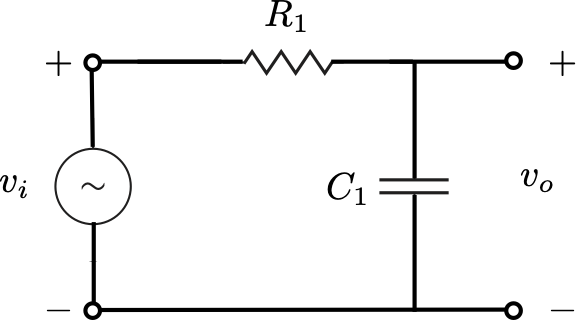

A função de transferência do sistema é dada por (ver Aula 5):

$$ G(s) = \frac{V_o(s)}{V_i(s)} = \frac{1}{RCs + 1} $$

Considere os seguintes parâmetros: $R=6.8k\Omega$ e $C=22nF$.

In [5]:
# Parâmetros do sistema RC:
R = 6.8e3  # 6.8kO
C= 22e-9

# Função de transferência:
num = np.array([1])
den = np.array([R*C, 1])
G1 = ct.tf(num, den)

print('G1(s) = {}'.format(G1))

G1(s) = 
       1
---------------
0.0001496 s + 1



O sistema não possui zeros, e possui apenas um pólo real: 

$$s_1=-\frac{1}{RC} = -6684.5$$

Pólos de G1(s): 
[[-6684.49197861]]


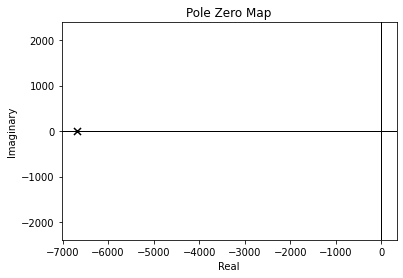

In [6]:
# Pólos and zeros:
(p, z) = ct.pzmap(G1)
p = np.reshape(p, (len(p), 1))
print('Pólos de G1(s): \n{}'.format(p))

## Resposta Transitória

A constante de tempo deste sistema de primeira ordem é dada por:

$$\tau = RC = 1.496 \times 10^{-4}$$ 

A resposta do sistema a uma entrada degrau unitário é dada por:

$$ V_o(t) = 1 - e^{-6684.5t}$$ 

Pode ser obtida usando a biblioteca de controle pelos comandos:

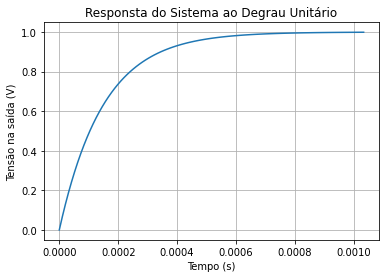

In [7]:
# Resposta ao degrau unitário:
(t, y) = ct.step_response(G1)
plt.plot(t, y)
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão na saída (V)')
plt.title('Responsta do Sistema ao Degrau Unitário')
plt.grid()
plt.show()

Para observar os valores da saída próximo a $63.2\%$ do valor da entrada, por exemplo, entre $60\%$ e $70\%$:

In [8]:
intervalo_y = y[(y>0.6)&(y<0.7)]
# display(intervalo_y)
print('Valores de saída: Vo = {}'.format(intervalo_y))

Valores de saída: Vo = [0.62350642 0.64888083 0.67254508 0.69461445]


Então para obter o instante de tempo para cada um dos valores:

In [9]:
intervalo_t = t[np.where((y>0.6)&(y<0.7))]
#display(intervalo_t)
print('Valores de tempo: t = {}'.format(intervalo_t))

Valores de tempo: t = [0.00014614 0.00015658 0.00016701 0.00017745]


Observe que nenhum dos valores da saída $V_o$ é exatamente no valor $0.632$, mas é possível obter a resposta ao degrau para um vetor intervalos de tempo pré-definido:

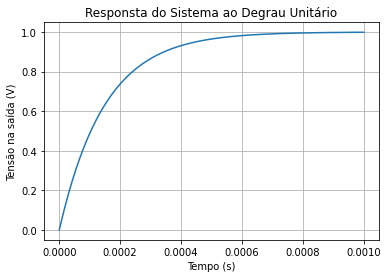

In [10]:
t_i = np.arange(0, 0.001, 0.0000005) # tempo inicial é 0, tempo final 0.001, intervalo de tempo entre os pontos é 0.0000005
(t, y) = ct.step_response(G1,t_i)
plt.plot(t, y)
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão na saída (V)')
plt.title('Responsta do Sistema ao Degrau Unitário')
plt.grid()
plt.show()


In [11]:
intervalo_y = y[(y>0.63)&(y<0.64)]
# display(intervalo_y)
print('Valores de saída: Vo = {}'.format(intervalo_y))

intervalo_t = t[np.where((y>0.63)&(y<0.64))]
#display(intervalo_t)
print('Valores de tempo: t = {}'.format(intervalo_t))

Valores de saída: Vo = [0.63064214 0.63187457 0.63310288 0.63432709 0.63554722 0.63676328
 0.63797528 0.63918324]
Valores de tempo: t = [0.000149  0.0001495 0.00015   0.0001505 0.000151  0.0001515 0.000152
 0.0001525]


## Resposta em frequência



O gráfico de bode mostra a resposta em frequência do sistema:

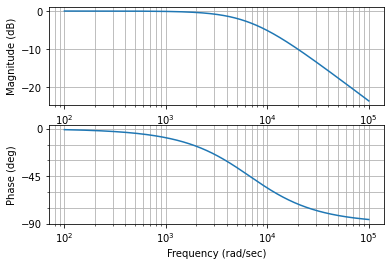

In [12]:
# Diagrama de Bode:
#plt.figure(2)
ct.bode_plot(G1, dB=True)
plt.show(block=False)

Para um sistema de primeira ordem a frequência de corte em rad/s é dada por:

$$ w_c = \frac{1}{\tau} = -s_1$$

Para o circuito RC considerado aqui:

$$w_c = 6684.5 ~rad/s$$

O codigo a seguir é usado para verificar o ganho e a fase do sistema para a ferquencia de corte.

In [13]:
wc = 1/(R*C)
mag, phase, omega = ct.bode(G1, wc, plot=False)
print('Ganho do sistema em dB para frequencia de corte: {}'.format(20*np.log10(mag)))
print('Fase do sistema em graus para frequencia de corte: {}'.format(180*phase/np.pi))

Ganho do sistema em dB para frequencia de corte: [-3.01029996]
Fase do sistema em graus para frequencia de corte: [-45.]


Observe que para frequências acima da frequencia de corte, o decaimento do ganho em dB é de -20dB/dec:

In [14]:
w1 = 10*wc
w2 = 100*wc
mag, phase, omega = ct.bode(G1, w1, plot=False)
print('Ganho do sistema em dB para 10*wc: {}'.format(20*np.log10(mag)))
mag, phase, omega = ct.bode(G1, w2, plot=False)
print('Ganho do sistema em dB para 100*wc: {}'.format(20*np.log10(mag)))


Ganho do sistema em dB para 10*wc: [-20.04321374]
Ganho do sistema em dB para 100*wc: [-40.00043427]


# Sistemas de Segunda Ordem

Considere o sistema de RLC da figura:

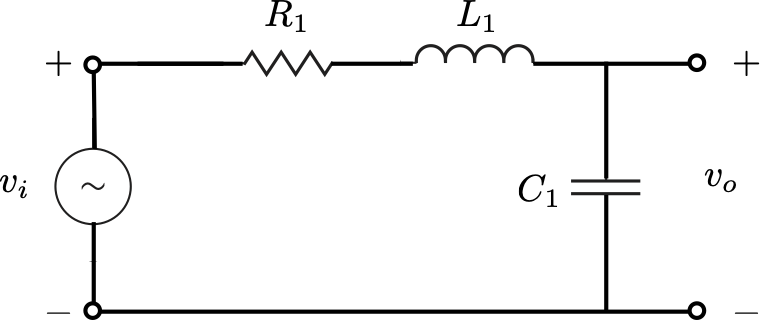

A função de transferência do sistema RLC é dada por:

$$G(s) = \frac{1}{L_1C_1 s^2 + R_1C_1 s +1} = \frac{\frac{1}{L_1C_1}}{s^2 + \frac{R_1}{L_1}s + \frac{1}{L_1C_1}}$$

Um sistema de segunda ordem pode ser representado em função do coeficiente de amortecimento $\zeta$, da frequencia natural não-amortecida $w_n$, e de um ganho $K$ por:

$$G(s) = K \frac{w_n^2}{s^2 + 2\zeta w_n s + w_n^2}$$

Portanto para o circuito RLC:

$$w_n = \sqrt{\frac{1}{L_1C_1}}$$

$$ \zeta = \frac{R_1 \sqrt{L_1 C_1}}{2 L_1}$$

Note que ao escolher o valor de $L_1$ e $C_1$, a frequencia natural não amortecida, $w_n$, é defina. Então, o valor do coeficiente de amortecimento, $\zeta$, dependerá do valor da resistência $R_1$.

## Sistema de segunda ordem sobre-amortecido $\zeta > 1$

Considere um cicuito RLC para $L_1 = 490.8mH$ e C_1=69nF.

A frequencia natural do sistema $w_n = 5434.04 ~rad/s$.

In [15]:
L=490.8e-3
C=69e-9
wn=np.sqrt(1/(L*C))
print('Frequencia natural não amortecida: {} rad/s'.format(wn))


Frequencia natural não amortecida: 5434.04433760501 rad/s


Para $\zeta = 2$ e os valores de $L_1$ e $C_1$ fornecidos:

$$R_1 = \frac{2\zeta L_1}{\sqrt{L_1 C_1}} = 10668 \Omega$$

In [16]:
zeta = 2
R = 2*zeta*L/(np.sqrt(L*C))
print('Valor de R para coeficiente de amortecimento igual a 2: R1 = {}'.format(R))


Valor de R para coeficiente de amortecimento igual a 2: R1 = 10668.115843586154


A função de transferência do sistema será dada por:

In [18]:
# Função de transferência:
num = np.array([wn*wn])
den = np.array([1, 2*zeta*wn, wn*wn])
G2 = ct.tf(num, den)

print('G(s) = {}'.format(G2))

G(s) = 
          2.953e+07
-----------------------------
s^2 + 2.174e+04 s + 2.953e+07



Os pólos do sistema são:

Pólos de G(s): 
[[-20280.12955852]
 [ -1456.0477919 ]]


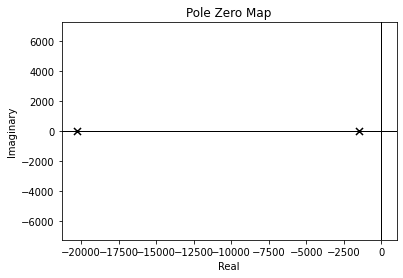

In [19]:
# Pólos and zeros:
(p, z) = ct.pzmap(G2)
p = np.reshape(p, (len(p), 1))
print('Pólos de G(s): \n{}'.format(p))

A resposta ao degrau unitário:

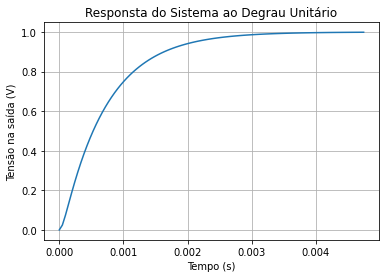

In [20]:
# Resposta ao degrau unitário:
(t, y) = ct.step_response(G2)
plt.plot(t, y)
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão na saída (V)')
plt.title('Responsta do Sistema ao Degrau Unitário')
plt.grid()
plt.show()

A resposta em frequencia:

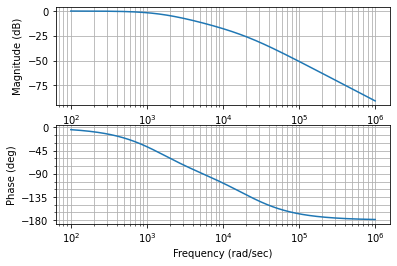

In [21]:
# Diagrama de Bode:
#plt.figure(2)
ct.bode_plot(G2, dB=True)
plt.show(block=False)

Observe que o decaimento do ganho entre os pólos é de aproximadamente -20db/dec:

In [22]:
w1 = 1800
w2 = 10*w1
mag, phase, omega = ct.bode(G2, w1, plot=False)
print('Ganho do sistema em dB para w1 > -s1: {}'.format(20*np.log10(mag)))
mag, phase, omega = ct.bode(G2, w2, plot=False)
print('Ganho do sistema em dB para 10*w1 < -s2: {}'.format(20*np.log10(mag)))


Ganho do sistema em dB para w1 > -s1: [-4.06227489]
Ganho do sistema em dB para 10*w1 < -s2: [-24.39339735]


Observe que o decaimento do ganho após o segundo pólos é de aproximadamente -40db/dec:

In [23]:
w1 = 70000
w2 = 10*w1
mag, phase, omega = ct.bode(G2, w1, plot=False)
print('Ganho do sistema em dB para w1 > -s2: {}'.format(20*np.log10(mag)))
mag, phase, omega = ct.bode(G2, w2, plot=False)
print('Ganho do sistema em dB para 10*w1: {}'.format(20*np.log10(mag)))


Ganho do sistema em dB para w1 > -s2: [-44.7509073]
Ganho do sistema em dB para 10*w1: [-84.40265703]


## Sistema de segunda ordem criticamente amortecido $\zeta = 1$

Para $\zeta = 1$ e os valores de $L_1$ e $C_1$ fornecidos:

$$R_1 = \frac{2\zeta L_1}{\sqrt{L_1 C_1}} = 5334 \Omega$$

In [24]:
zeta = 1
R = 2*zeta*L/(np.sqrt(L*C))
print('Valor de R para coeficiente de amortecimento igual a 1: R1 = {}'.format(R))


Valor de R para coeficiente de amortecimento igual a 1: R1 = 5334.057921793077


A função de transferência do sistema será dada por:

In [25]:
# Função de transferência:
num = np.array([wn*wn])
den = np.array([1, 2*zeta*wn, wn*wn])
G2 = ct.tf(num, den)

print('G(s) = {}'.format(G2))

G(s) = 
          2.953e+07
-----------------------------
s^2 + 1.087e+04 s + 2.953e+07



Os dois pólos reais do sistema são iguais a $s_{1,2}=-w_n$:

Pólos de G2(s): 
[[-5434.04433761]
 [-5434.04433761]]


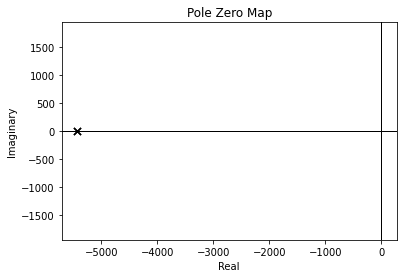

In [26]:
# Pólos and zeros:
(p, z) = ct.pzmap(G2)
p = np.reshape(p, (len(p), 1))
print('Pólos de G2(s): \n{}'.format(p))

A resposta ao degrau unitário:

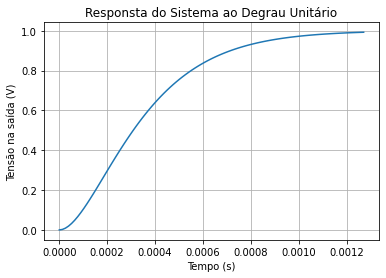

In [27]:
# Resposta ao degrau unitário:
(t, y) = ct.step_response(G2)
plt.plot(t, y)
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão na saída (V)')
plt.title('Responsta do Sistema ao Degrau Unitário')
plt.grid()
plt.show()

A resposta em frequencia:

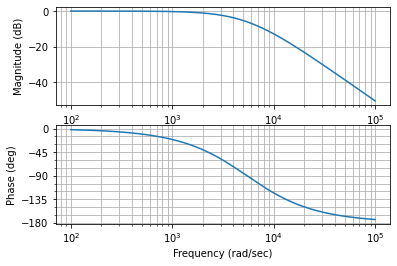

In [28]:
# Diagrama de Bode:
#plt.figure(2)
ct.bode_plot(G2, dB=True)
plt.show(block=False)

Observe que o decaimento do ganho após $w_n$ é de aproximadamente -40db/dec:

In [30]:
w1 = 5*wn
w2 = 10*w1
mag, phase, omega = ct.bode(G2, w1, plot=False)
print('Ganho do sistema em dB para w1 > wn: {}'.format(20*np.log10(mag)))
mag, phase, omega = ct.bode(G2, w2, plot=False)
print('Ganho do sistema em dB para 10*w1 : {}'.format(20*np.log10(mag)))


Ganho do sistema em dB para w1 > wn: [-28.29946696]
Ganho do sistema em dB para 10*w1 : [-67.96227383]


## Sistema de segunda ordem sub-amortecido $0 < \zeta < 1$

Para $\zeta = 0.2$ e os valores de $L_1$ e $C_1$ fornecidos:

$$R_1 = \frac{2\zeta L_1}{\sqrt{L_1 C_1}} = 1067 \Omega$$

In [31]:
zeta = 0.2
R = 2*zeta*L/(np.sqrt(L*C))
print('Valor de R para coeficiente de amortecimento igual a 1: R1 = {}'.format(R))


Valor de R para coeficiente de amortecimento igual a 1: R1 = 1066.8115843586154


A função de transferência do sistema será dada por:

In [32]:
# Função de transferência:
num = np.array([wn*wn])
den = np.array([1, 2*zeta*wn, wn*wn])
G2 = ct.tf(num, den)

print('G2(s) = {}'.format(G2))

G2(s) = 
       2.953e+07
------------------------
s^2 + 2174 s + 2.953e+07



Os pólos do sistema são:

Pólos de G2(s): 
[[-1086.80886752+5324.25434672j]
 [-1086.80886752-5324.25434672j]]


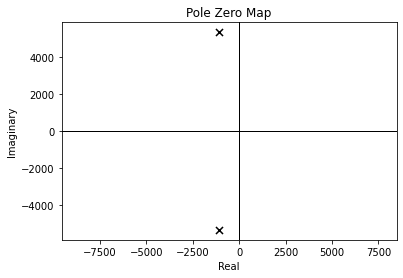

In [33]:
# Pólos and zeros:
(p, z) = ct.pzmap(G2)
p = np.reshape(p, (len(p), 1))
print('Pólos de G2(s): \n{}'.format(p))

A resposta ao degrau unitário:

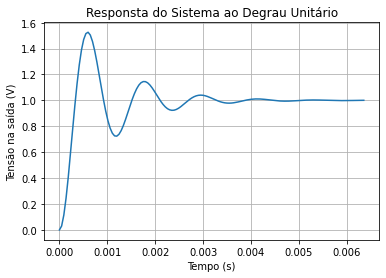

In [34]:
# Resposta ao degrau unitário:
(t, y) = ct.step_response(G2)
plt.plot(t, y)
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão na saída (V)')
plt.title('Responsta do Sistema ao Degrau Unitário')
plt.grid()
plt.show()

A resposta em frequencia:

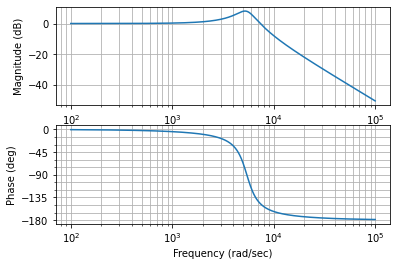

In [35]:
# Diagrama de Bode:
#plt.figure(2)
ct.bode_plot(G2, dB=True)
plt.show(block=False)

Observe que o decaimento do ganho após a frequencia natural não amortecida, $w_n$, é de aproximadamente -40db/dec:

In [36]:
w1 = 5*wn
w2 = 10*w1
mag, phase, omega = ct.bode(G2, w1, plot=False)
print('Ganho do sistema em dB para w1 > wn: {}'.format(20*np.log10(mag)))
mag, phase, omega = ct.bode(G2, w2, plot=False)
print('Ganho do sistema em dB para 10*w1: {}'.format(20*np.log10(mag)))


Ganho do sistema em dB para w1 > wn: [-27.63427994]
Ganho do sistema em dB para 10*w1: [-67.95560328]


Observe também que para a frequência $w_n$, o ganho é positivo:

In [37]:
mag, phase, omega = ct.bode(G2, wn, plot=False)
print('Ganho do sistema em dB para wn: {}'.format(20*np.log10(mag)))


Ganho do sistema em dB para wn: [7.95880017]


### Desempenho da resposta transitória do sistema de segunda ordem sub-amortecido

Como exercício, encontre as seguintes medidas para a resposta transitória a uma entrada degrau unitário:

* Tempo de subida, $t_r$
* Tempo de pico, $t_p$
* Sobresinal, $M_p$
* Tempo de acomodação, $t_s$




In [38]:
## Implemente seu código aqui


